# Python libraries and an introduction to graphing

As discussed previously, in this course we make extensive use of the following libraries:

- [Numpy](https://numpy.org) is a library for working with arrays of data.

- [Pandas](https://pandas.pydata.org) is a library for manipulating data frames.

- [Scipy](https://scipy.org) is a library of techniques for numerical and scientific computing.

- [Statsmodels](https://www.statsmodels.org/stable/index.html) is a library with many methods for statistical data analysis

- [Matplotlib](https://matplotlib.org) is a library for making visualizations.

- [Seaborn](https://seaborn.pydata.org) is a higher-level interface to Matplotlib that can be used to simplify many visualization tasks.

Last week we provided an overview of using Numpy and Pandas for manipulating datasets. Here we first provide a brief illustration of using Scipy to work with probability distributions, then we provide an overview of using Matplotlib and Seaborn for producing graphs.

_**Important**: While this tutorial provides insight into the basics of these libraries, we recommend digging into the documentation that is available online._


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## SciPy

SciPy provides a large number of functions that are useful for different types of scientific and engineering applications. Many SciPy functions operate on numpy arrays. For this course, we will primarily be using the **SciPy.Stats** sub-module. SciPy.Stats calculates density and mass functions, cumulative distribution functions, and quantile functions for many probability distributions. We will use these functions in the second and third courses of this series when we do more formal statistical analysis. If you are not familiar with probability distributions you can skip this section.

As a starting example, suppose we want to evaluate the cumulative distribution function (CDF) of the standard normal distribution at zero. Since zero is the median of the standard normal distribution, the resulting cumulative probability should be 1/2.


In [3]:
stats.norm.cdf(0)

0.5

Below are some additional examples of working with probability distributions:


In [4]:
# The median of a standard Student's t distribution with 10 degrees of freedom
print(stats.t(10).ppf(0.5))

# The 97.5 percentile of a standard Student's t distribution with 5 degrees of freedom
print(stats.t(5).ppf(0.975))

# The probability that a standard normal value is less than or equal to 3
print(stats.expon.cdf(3))

# The height of the standard normal density function at 1
print(stats.norm.pdf(1))

# The probability of getting exactly 3 heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).pmf(3))

# The probability of getting 3 or fewer heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).cdf(3))

6.80574793290978e-17
2.5705818366147395
0.950212931632136
0.24197072451914337
0.1171875
0.171875


## MatPlotLib

Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module.

First we plot a sine wave:


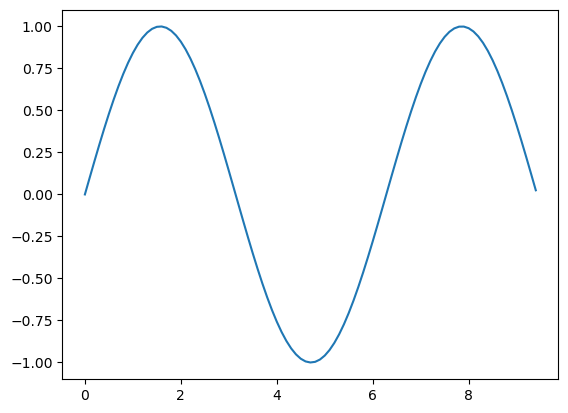

In [5]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

Next we make a slightly fancier version of the sine wave graph with a grid, axis labels, and colored broken plotting lines.


Text(0.5, 0, 'X')

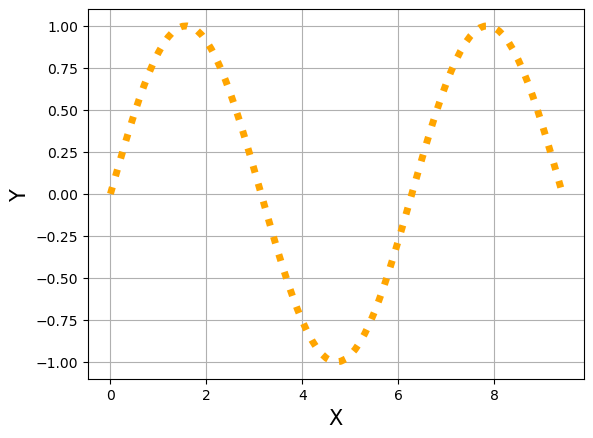

In [6]:
plt.grid(True)
plt.plot(x, y, ":", lw=5, color="orange")
plt.ylabel("Y", size=15)
plt.xlabel("X", size=15)

The next graph plots a sine wave and a cosine wave on the same axes, and labels them so that they can be distinguished.


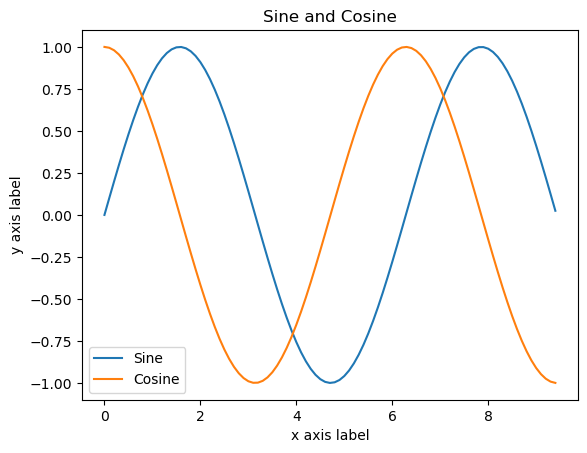

In [7]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel("x axis label")
plt.ylabel("y axis label")
plt.title("Sine and Cosine")
plt.legend(["Sine", "Cosine"])

Sometimes it is useful to have multiple plots in the same figure. This can be done as follows:


Text(0.5, 1.0, 'Cosine')

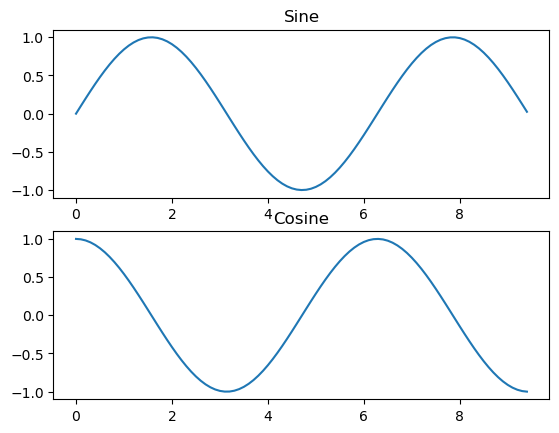

In [8]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title("Sine")

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title("Cosine")

## Seaborn

Seaborn is essentially a high-level interface to Matplotlib that is intended to make statistical data visualization easier. Any plot that can be made in Seaborn can also be made in Matplotlib, but certain types of graphs are easier to make in Seaborn (and some others may be easier to make in Matplotlib).

#### Scatterplots

The following plot is a basic scatterplot.


<Axes: xlabel='Wingspan', ylabel='CWDistance'>

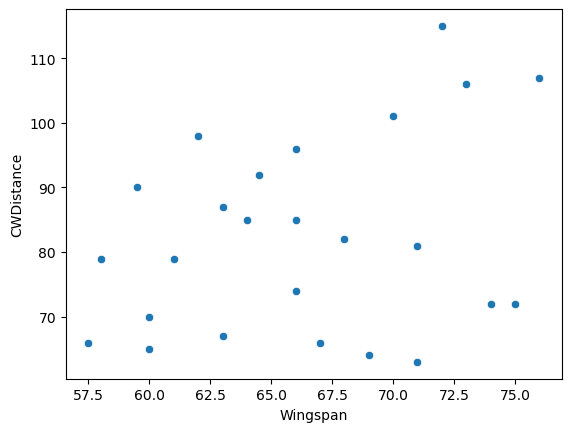

In [9]:
# Store the url string that hosts our .csv file
url = "Cartwheeldata.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url)

# Create Scatterplot
sns.scatterplot(x="Wingspan", y="CWDistance", data=df)

Now we add more information to the scatterplot, by plotting females and males in different colors.


<Axes: xlabel='Wingspan', ylabel='CWDistance'>

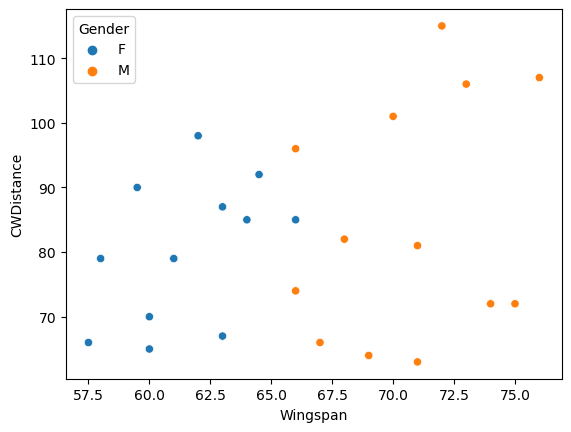

In [10]:
sns.scatterplot(x="Wingspan", y="CWDistance", hue="Gender", data=df)

A "swarmplot" is a type of scatterplot for situations where one variable is categorical. Note that the categorical variable is "jittered" to reduce overplotting.


c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='CWDistance'>

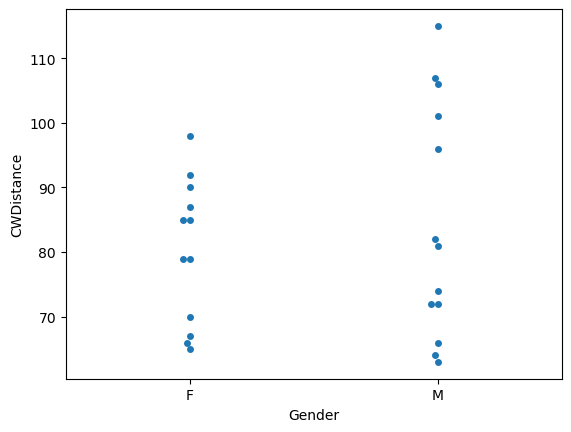

In [11]:
sns.swarmplot(x="Gender", y="CWDistance", data=df)

#### Boxplots


A boxplot is one of the most useful ways to display several distributions side-by-side for comparison.


<Axes: >

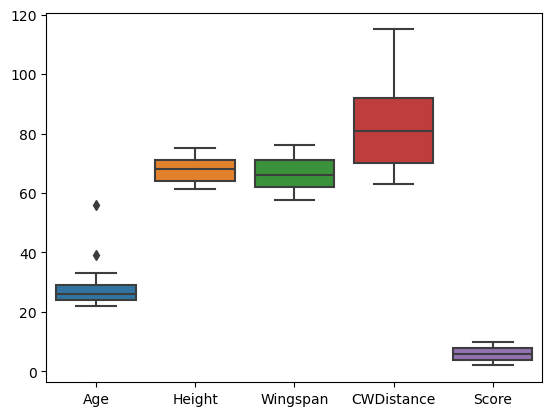

In [12]:
sns.boxplot(data=df.loc[:, ["Age", "Height", "Wingspan", "CWDistance", "Score"]])

<Axes: >

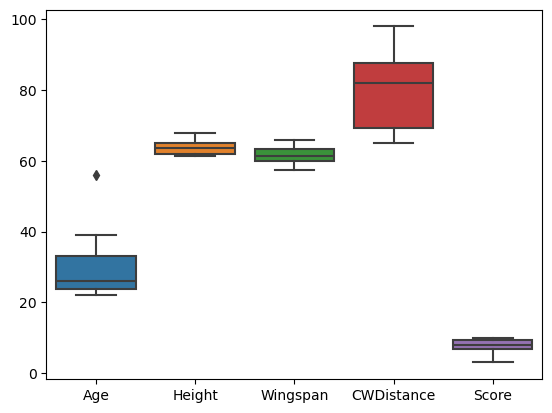

In [15]:
# A boxplot only of females
sns.boxplot(
    data=df.loc[
        df["Gender"] == "F", ["Age", "Height", "Wingspan", "CWDistance", "Score"]
    ]
)

<Axes: >

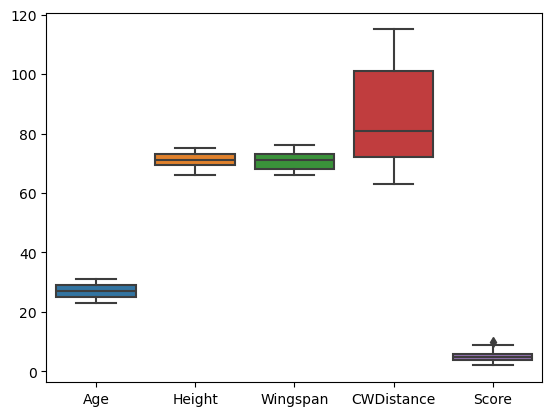

In [16]:
# A boxplot only of males
sns.boxplot(
    data=df.loc[
        df["Gender"] == "M", ["Age", "Height", "Wingspan", "CWDistance", "Score"]
    ]
)

#### Histogram

A histogram is a way to display the shape of a distribution.


c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


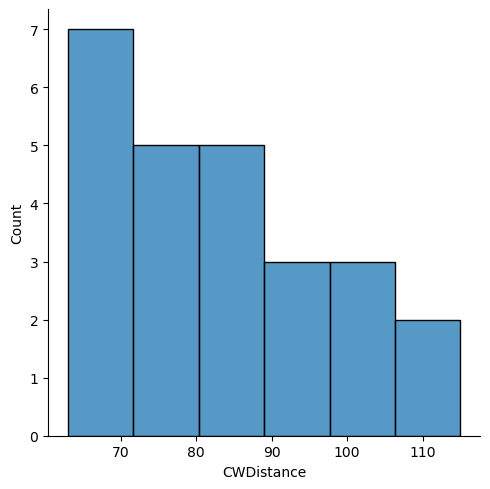

In [17]:
sns.displot(df.CWDistance)

#### Count Plot


A count plot (a.k.a. bar plot) displays frequencies:


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

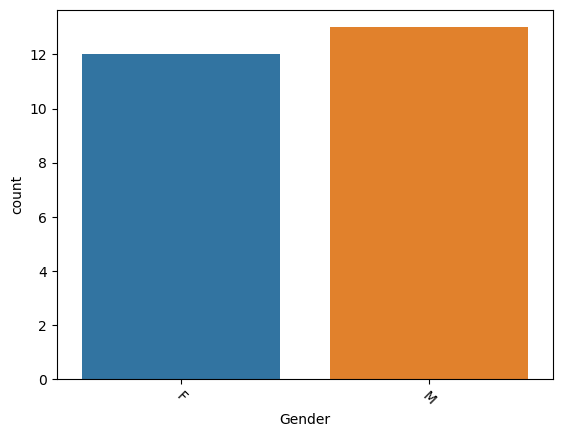

In [18]:
sns.countplot(x="Gender", data=df)
plt.xticks(rotation=-45)